In this notebook, we explore the biological relevance of this clusters by looking at the difference in medical usage by this two clusters.



In [1]:
# --- PART 0: SETUP AND LIBRARIES ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

We load the cluster data created in the previous notebook and also the medicine history we had obtained earlier.

In [2]:
# --- PART 1: DATA LOADING AND PREPARATION ---

cluster_data = pd.read_csv("cluster_data.csv")[['participant_id', 'cluster']]
med_history = pd.read_csv("cleaned_med_data.csv")


In [3]:
cluster_data_with_medical_history = cluster_data.merge(med_history, on = "participant_id", how = "outer")
cluster_data_with_medical_history.head()

,participant_id,cluster,on_levodopa,on_dopamine_agonist,on_other_pd_medications
0,BF-1002,NaN,1,0,0
1,BF-1003,NaN,1,1,1
2,BF-1004,NaN,1,0,0
3,BF-1006,NaN,1,1,0
4,BF-1008,NaN,1,0,1


In [4]:
cluster_data_with_medical_history.dropna(inplace = True)

In [5]:
cluster_data_with_medical_history['participant_id'].nunique()

1055

We are working with 1055 unique participants in this notebook.

In [6]:
cluster_data_with_medical_history.head()

,participant_id,cluster,on_levodopa,on_dopamine_agonist,on_other_pd_medications
763,PD-PDAA503EF5,0.0,1,1,1
764,PD-PDAA503EF5,0.0,1,1,1
765,PD-PDAA503EF5,0.0,1,1,1
766,PD-PDAA503EF5,0.0,1,1,1
768,PD-PDAB549YWB,1.0,1,1,1


In [7]:
cluster_data_with_medical_history.nunique()

participant_id             1055
cluster                       2
on_levodopa                   2
on_dopamine_agonist           2
on_other_pd_medications       2
dtype: int64


--- Part 3: Analyzing Medication Usage by Cluster  ---


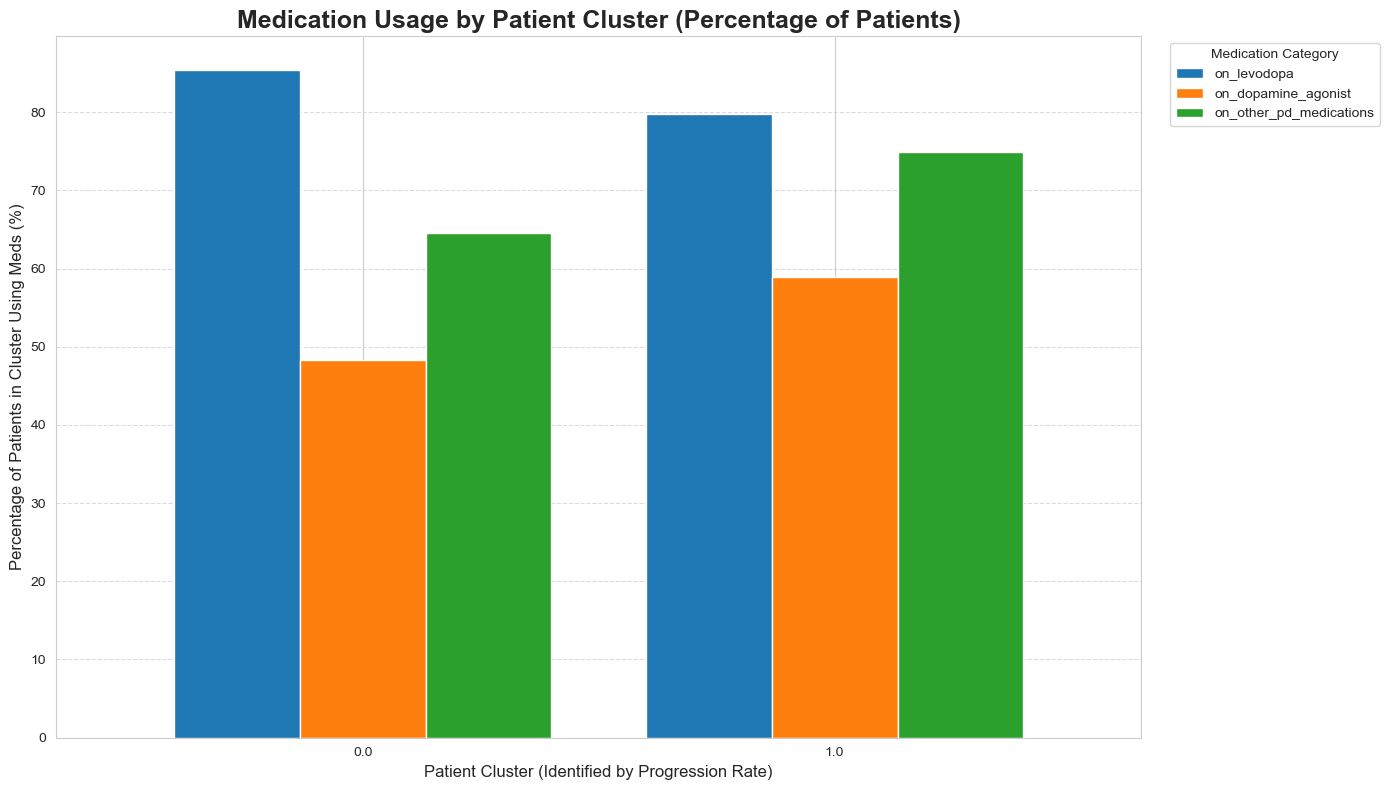


Percentage of Patients Using Each Medication Category, by Cluster:
         on_levodopa  on_dopamine_agonist  on_other_pd_medications
cluster                                                           
0.0             85.4                 48.2                     64.5
1.0             79.7                 58.9                     74.9

--- Analysis Complete ---


In [6]:
# --- PART 2: MEDICATION USAGE ANALYSIS 
print("\n--- Part 3: Analyzing Medication Usage by Cluster  ---")

med_columns = ['on_levodopa', 'on_dopamine_agonist', 'on_other_pd_medications']


# Calculate the mean for each medication column, grouped by cluster.
# The mean of a 1/0 column is the percentage of 1s (i.e., 'yes' values).
percentage_usage = cluster_data_with_medical_history.groupby('cluster')[med_columns].mean() * 100

# Visualize the comparison - This is the key plot for the business story
fig_med, ax_med = plt.subplots(figsize=(14, 8))
percentage_usage.plot(kind='bar', ax=ax_med, width=0.8)

ax_med.set_title('Medication Usage by Patient Cluster (Percentage of Patients)', fontsize=18, fontweight='bold')
ax_med.set_ylabel('Percentage of Patients in Cluster Using Meds (%)', fontsize=12)
ax_med.set_xlabel('Patient Cluster (Identified by Progression Rate)', fontsize=12)
ax_med.tick_params(axis='x', rotation=0)
ax_med.legend(title='Medication Category', bbox_to_anchor=(1.02, 1), loc='upper left')
ax_med.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display the percentage table for a precise view
print("\nPercentage of Patients Using Each Medication Category, by Cluster:")
print(percentage_usage.round(1))
print("\n--- Analysis Complete ---")


We can observe that the medical usage in cluster 0 is significantly different from that in cluster 1. Patients in cluster 0 are more significantly on levodopa, 
whereas those in cluster 1 are on the other medications. To be sure, we employ a statistical test.

In [ ]:
print("\n--- Part 3: Hypothesis Testing for Statistical Significance ---")
print("Null Hypothesis (H0): Medication usage is independent of the patient cluster.")
print("Alternative Hypothesis (H1): Medication usage is dependent on the patient cluster.\n")

for med_col in med_columns:
    # Create a contingency table (counts of on/off medication vs. cluster)
    contingency_table = pd.crosstab(cluster_data_with_medical_history['cluster'], cluster_data_with_medical_history[med_col])
    
    # Perform the Chi-Squared Test
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    
    print(f"--- Results for '{med_col}' ---")
    print(f"Chi-Squared Statistic: {chi2:.4f}")
    print(f"P-value: {p_value:.4f}")
    
    # Interpret the result
    alpha = 0.05
    if p_value < alpha:
        print(f"Conclusion: We REJECT the null hypothesis. The difference in '{med_col}' usage between clusters is statistically significant.")
    else:
        print(f"Conclusion: We FAIL to reject the null hypothesis. There is not enough evidence to say the difference in '{med_col}' usage is significant.")
    print("-" * 40)

print("\n--- Analysis Complete ---")




--- Part 4: Hypothesis Testing for Statistical Significance ---
Null Hypothesis (H0): Medication usage is independent of the patient cluster.
Alternative Hypothesis (H1): Medication usage is dependent on the patient cluster.

--- Results for 'on_levodopa' ---
Chi-Squared Statistic: 27.3652
P-value: 0.0000
Conclusion: We REJECT the null hypothesis. The difference in 'on_levodopa' usage between clusters is statistically significant.
----------------------------------------
--- Results for 'on_dopamine_agonist' ---
Chi-Squared Statistic: 57.4509
P-value: 0.0000
Conclusion: We REJECT the null hypothesis. The difference in 'on_dopamine_agonist' usage between clusters is statistically significant.
----------------------------------------
--- Results for 'on_other_pd_medications' ---
Chi-Squared Statistic: 64.7895
P-value: 0.0000
Conclusion: We REJECT the null hypothesis. The difference in 'on_other_pd_medications' usage between clusters is statistically significant.
------------------------

We reject the null hypothesis in all the cases showing that the clusters are biologically significant.  